In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('data.csv', encoding='ISO-8859-1')

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df=df[df['UnitPrice']>0 ]

In [10]:
df.min()

InvoiceNo                              536365
StockCode                               10002
Description     4 PURPLE FLOCK DINNER CANDLES
Quantity                               -80995
InvoiceDate                   1/10/2011 10:07
UnitPrice                               0.001
CustomerID                            12346.0
Country                             Australia
dtype: object

In [11]:
# Drop rows with missing values in critical columns
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [12]:
# Convert date column to datetime format (assuming 'InvoiceDate' column exists)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, and day for analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [13]:
# Filter rows for the year 2010 and 2011
rows_2010 = df[df['InvoiceDate'].dt.year == 2010].shape[0]
rows_2011 = df[df['InvoiceDate'].dt.year == 2011].shape[0]

print(f"Number of rows for the year 2010: {rows_2010}")
print(f"Number of rows for the year 2011: {rows_2011}")

Number of rows for the year 2010: 26847
Number of rows for the year 2011: 379942


In [14]:
# Calculate total sales (assuming columns 'Quantity' and 'UnitPrice')
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [15]:
# Aggregate total sales by month
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum().reset_index()

In [16]:
monthly_sales.dtypes

YearMonth     period[M]
TotalSales      float64
dtype: object

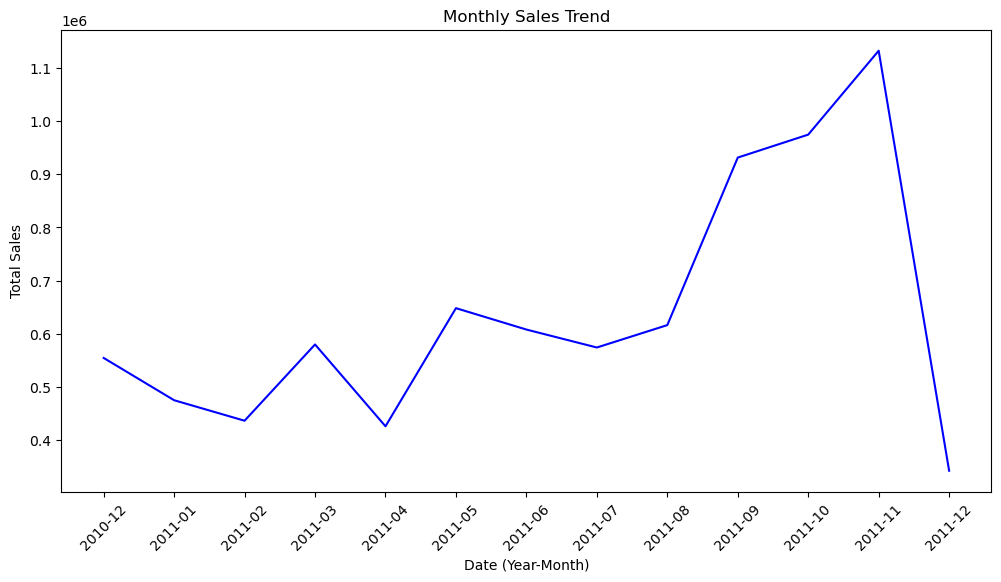

In [17]:
# Convert 'YearMonth' to string format (if it's a period type)
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.strftime('%Y-%m')

# Plot sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalSales',  color='b')
# Add title and labels
plt.title('Monthly Sales Trend')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Maede\AppData\Local\Temp\ipykernel_9100\3881530640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


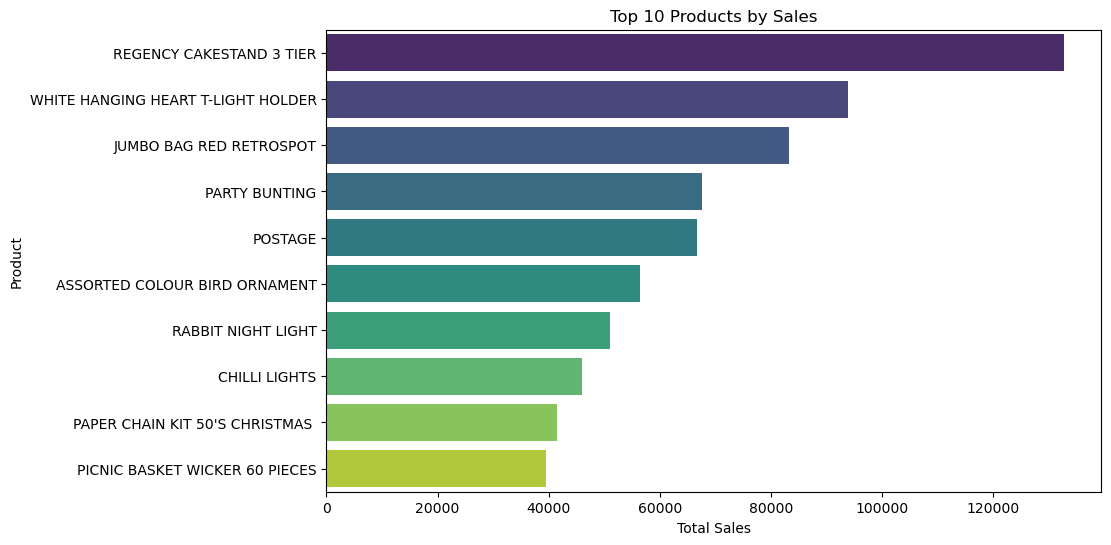

In [18]:
# Group by product and sum total sales
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 products by sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

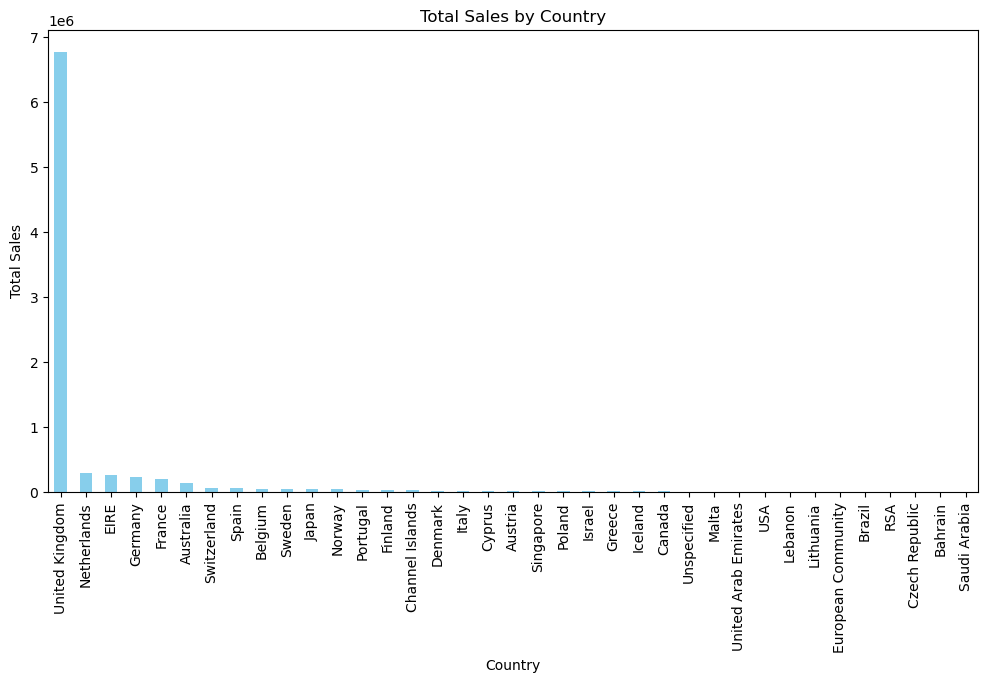

In [19]:
# Aggregate total sales by country
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plot total sales by country
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

C:\Users\Maede\AppData\Local\Temp\ipykernel_9100\1894847234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.head(10).index.astype(str), y=customer_sales.head(10).values, palette='coolwarm')


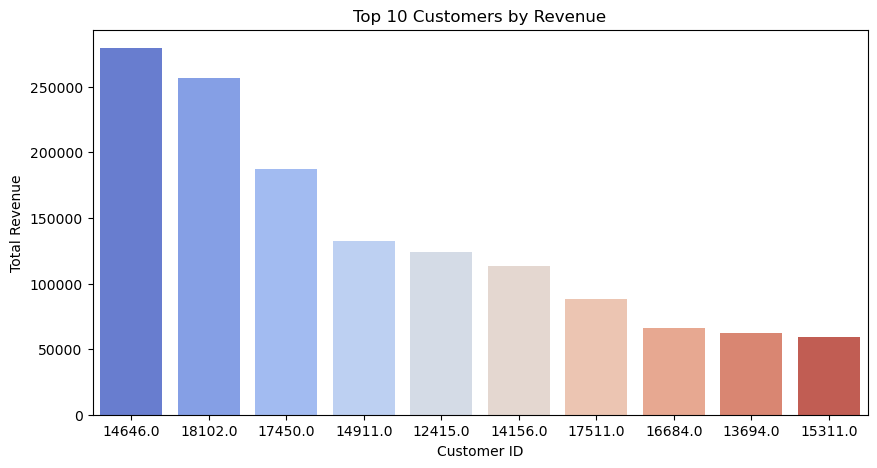

In [20]:
# Group by customer ID and sum total sales
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)

# Plot top 10 customers by revenue
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_sales.head(10).index.astype(str), y=customer_sales.head(10).values, palette='coolwarm')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()

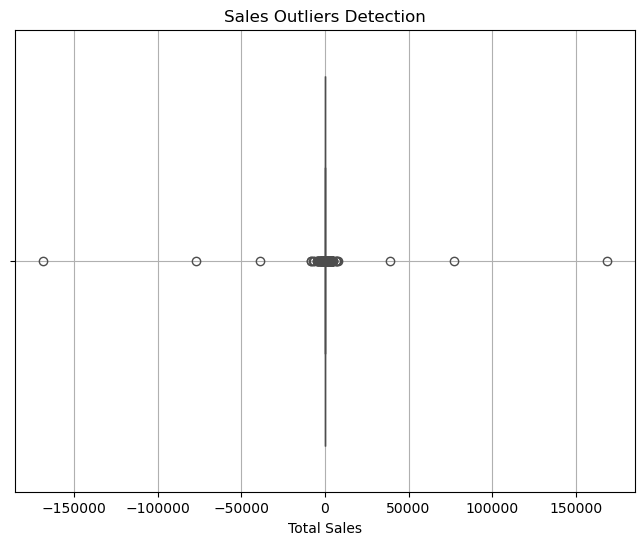

In [21]:
# Boxplot to detect outliers in total sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalSales'], color='red')
plt.title('Sales Outliers Detection')
plt.xlabel('Total Sales')
plt.grid(True)
plt.show()

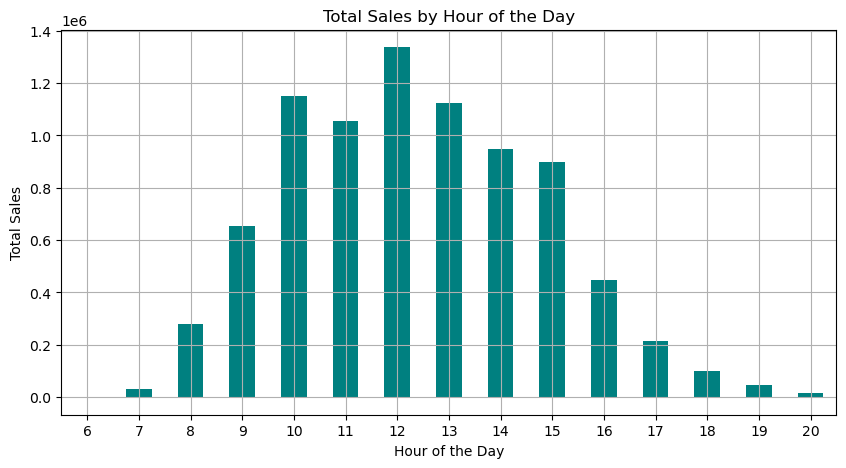

In [22]:
# Group sales by hour of the day
hourly_sales = df.groupby('Hour')['TotalSales'].sum()

# Plot sales by hour of the day
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

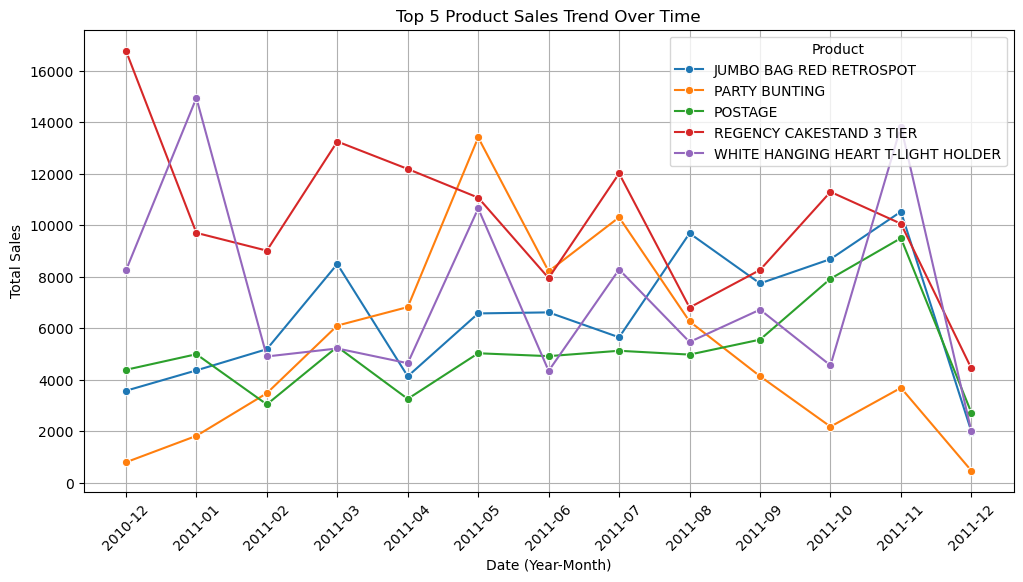

In [23]:
# Group sales by product and month
product_trend = df.groupby(['YearMonth', 'Description'])['TotalSales'].sum().reset_index()

# Select top 5 products to analyze
top_5_products = df.groupby('Description')['TotalSales'].sum().nlargest(5).index
product_trend = product_trend[product_trend['Description'].isin(top_5_products)]

# Convert 'YearMonth' to string format for plotting
product_trend['YearMonth'] = product_trend['YearMonth'].dt.strftime('%Y-%m')

# Plot sales trend of top 5 products
plt.figure(figsize=(12, 6))
sns.lineplot(data=product_trend, x='YearMonth', y='TotalSales', hue='Description', marker='o')
plt.title('Top 5 Product Sales Trend Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


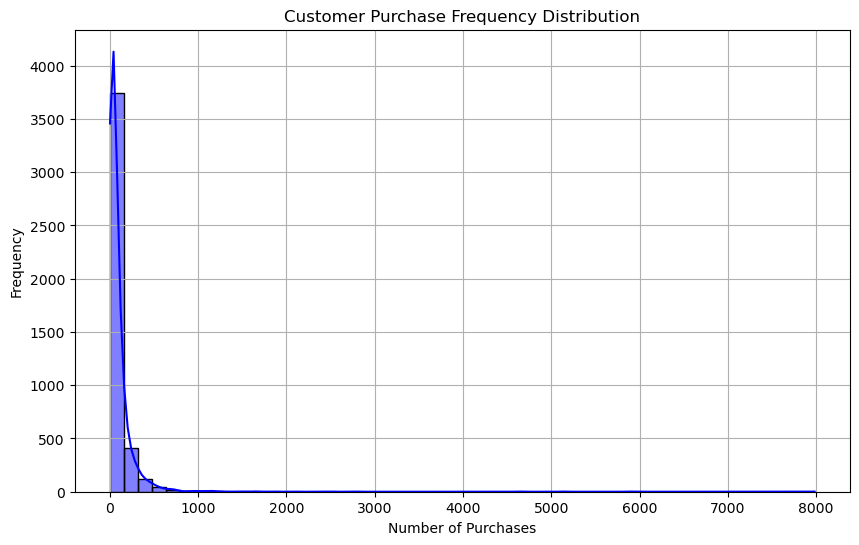

In [24]:
# Count purchases per customer
customer_purchases = df['CustomerID'].value_counts()

# Plot purchase frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchases, bins=50, kde=True, color='blue')
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

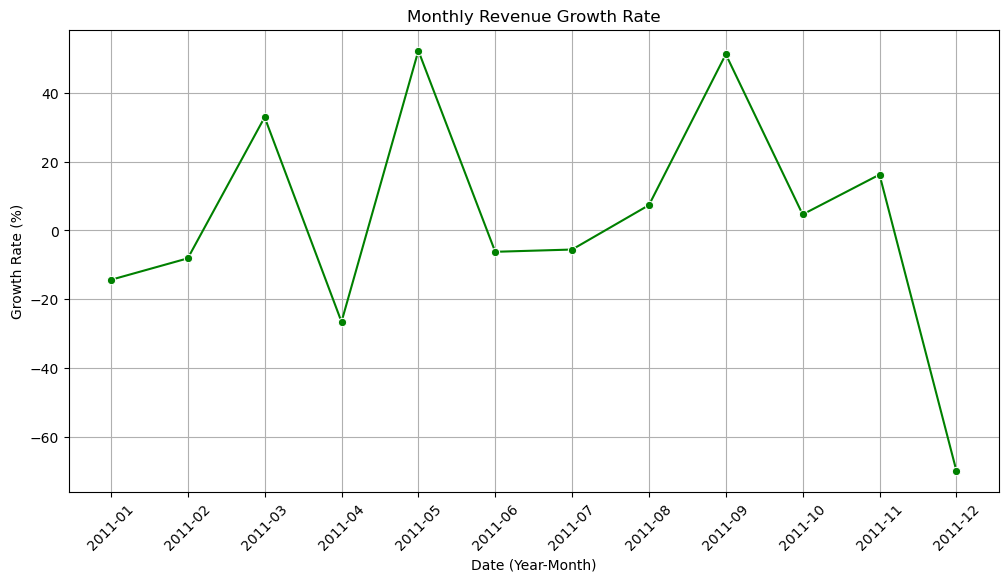

In [25]:
# Calculate monthly revenue growth
monthly_sales['RevenueGrowth'] = monthly_sales['TotalSales'].pct_change() * 100

# Plot monthly revenue growth rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='RevenueGrowth', marker='o', color='green')
plt.title('Monthly Revenue Growth Rate')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()